In [1]:
import numpy as np
import pandas
import pandas as pd

ranking_path = "/home/sasce/PycharmProjects/GitHubClassificationDataset/data/pairrank/mean_std_ranking.csv"
ranking = pandas.read_csv(ranking_path)
ranking = ranking.sort_values('mean', ascending=False)
ranking['description'] = ranking['description'].fillna('')
cluster_feature = 'mean'
ranking['pos'] = list(range(len(ranking['mean'])))
data = np.array(ranking['mean'].to_list()).reshape(-1,1)
#data = ranking[['mean', 'pos']]

In [2]:
min_k = 5
max_k = 15
timing = False

<AxesSubplot:title={'center':' '}, xlabel='k', ylabel='distortion score'>

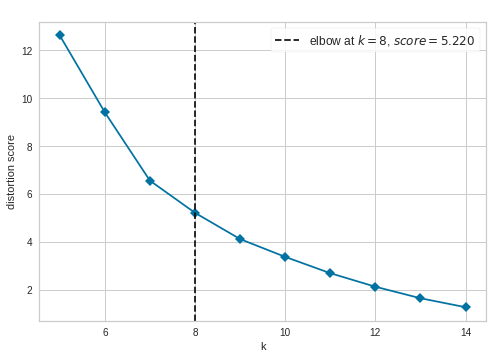

In [5]:
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(min_k,max_k), timings= timing, title=' ')
visualizer.fit(data)        # Fit data to visualizer
visualizer.show('elbow.pdf', bbox_inches='tight', pad_inches=0)        # Finalize and render figure

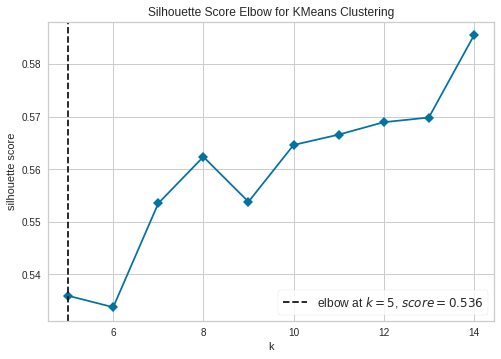

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [90]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(min_k,max_k),metric='silhouette', timings= timing)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

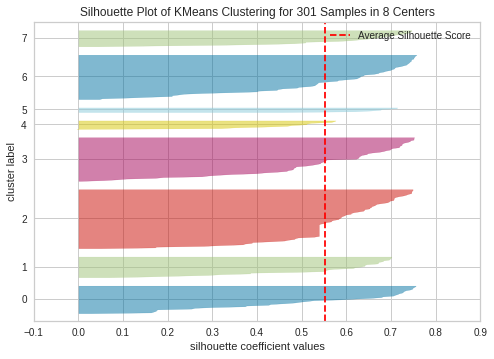

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 301 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(8)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

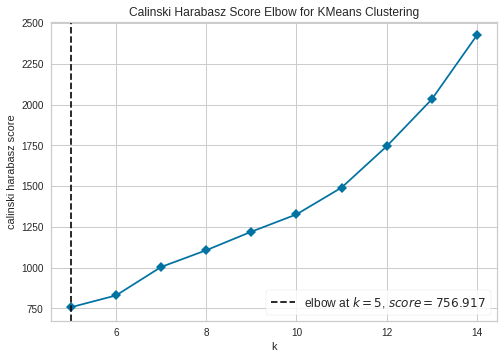

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [92]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(min_k,max_k),metric='calinski_harabasz', timings= timing)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [93]:
from collections import defaultdict
from sklearn.mixture import GaussianMixture
n_components = range(min_k, max_k)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score = defaultdict(list)
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(data)
        score[cov].append((n_comp,gmm.bic(data)))

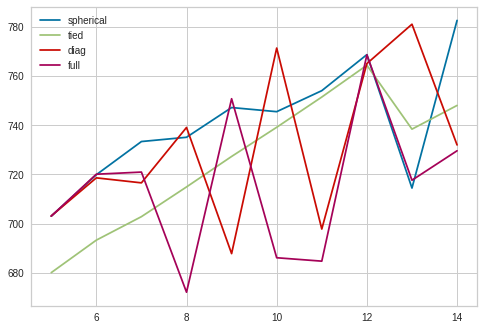

In [94]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
for cov in covariance_type:
    x = [i[0] for i in score[cov]]
    y = [i[1] for i in score[cov]]
    plt.plot(x, y, label = cov)
    df['x'] = x
    df['y'] = x
plt.legend()
plt.show()

In [95]:

df.to_csv('BIC_scores_full.csv', index=False)

In [96]:

n_components = range(min_k, max_k)
cov = 'full'
res = []
for i in range(30):
    n_components = range(min_k, max_k)
    x = []
    y = []
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov)
        gmm.fit(data)
        x.append(n_comp)
        y.append(gmm.bic(data))

    min_i = np.argmin(y)
    res.append(x[min_i])

In [97]:
np.mean(res)

9.366666666666667